# Survey evaluation

In [1]:
import re
from os.path import join
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_similarity_score
from constants import DATA_BASE, LDA_PATH, TPX_PATH, ETL_PATH, DATASETS
from utils import load, Unlemmatizer, TopicsLoader

pd.options.display.max_rows = 200
pd.options.display.max_columns = 300
pd.options.display.precision = 3

-----

### load data

In [2]:
# GET DEWAC1 TOP 20 TOPIC TERMS

dataset = 'dewac1'
param_ids = 'e42'
nbs_topics = 100
version = 'noun'
topn = 20

topics_loader = TopicsLoader(
    dataset=dataset,
    param_ids=param_ids,
    nbs_topics=nbs_topics,
    version=version,
    topn=topn
)
tpx = topics_loader.topics
tpx

Loading dictionary from ../data/preprocessed/LDAmodel/noun/bow/dewac1_noun_bow.dict
Loading model from ../data/preprocessed/LDAmodel/noun/bow/e42/dewac1_LDAmodel_e42_100_ep30


term0  \
dataset param_id nb_topics topic_idx                        
dewac1  e42      100       0                       Partei   
                           1                        König   
                           2          Lebenspartnerschaft   
                           3                       BetrVG   
                           4                 Gesellschaft   
                           5                      Artikel   
                           6                       Kirche   
                           7                 Entscheidung   
                           8                      Richter   
                           9                  Zivildienst   
                           10                      Mensch   
                           11                      Physik   
                           12                       Musik   
                           13                     Theater   
                           14                 Unternehmen   
                           15                       Regie   
                           16                         SPD   
                           17                Rechtsanwalt   
                           18                       Leute   
                           19                  Richtlinie   
                           20                   Bewerbung   
                           21                       Spiel   
                           22                        Frau   
                           23                         Dr.   
                           24                        Tier   
                           25                      Mensch   
                           26                        Land   
                           27                        Wahl   
                           28                        Ring   
                           29                 Hausaufgabe   
                           30                 Deutschland   
                           31                       Seite   
                           32                         USA   
                           33                        Bild   
                           34                      Israel   
                           35                    Programm   
                           36                     Kollege   
                           37                     Hamburg   
                           38                      Mensch   
                           39                  Mathematik   
                           40                        Kind   
                           41                    Training   
                           42                         Art   
                           43         Nachhilfeunterricht   
                           44                       Organ   
                           45                         Uhr   
                           46                     Sendung   
                           47                        Witz   
                           48                        Abs.   
                           49                Arbeitsplatz   
                           50                      Mensch   
                           51                        Euro   
                           52                    Hochzeit   
                           53                  Österreich   
                           54                      Berlin   
                           55                   Kommentar   
                           56               Veranstaltung   
                           57                     Störung   
                           58                    Akademie   
                           59                         Tag   
                           60                  Ausbildung   
                           61                    Fahrzeug   
                           62                   Regierung   
                           63                     Beitrag   
                          

In [3]:
file = join(DATA_BASE, 'crowdsourcing', 'TopicCoherenceSurvey', 'final_data', 'data_topicsde_2018-12-25_14-46.csv')
results = pd.read_csv(file, delimiter='\t', header=[0, 1])
results

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,T001,T001_01,T001_02,T001_03,T001_04,T001_05,T001_06,T001_07,T001_08,T001_09,T001_10,T001_11,T001_12,T001_13,T001_14,T001_15,T001_16,T001_17,T001_18,T001_19,T001_20,T002,T002_01,T002_02,T002_03,T002_04,T002_05,T002_06,T002_07,T002_08,T002_09,T002_10,T002_11,T002_12,T002_13,T002_14,T002_15,T002_16,T002_17,T002_18,T002_19,T002_20,T003,T003_01,T003_02,T003_03,T003_04,T003_05,T003_06,T003_07,T003_08,T003_09,T003_10,T003_11,T003_12,T003_13,T003_14,T003_15,T003_16,T003_17,T003_18,T003_19,T003_20,T004,T004_01,T004_02,T004_03,T004_04,T004_05,T004_06,T004_07,T004_08,T004_09,T004_10,T004_11,T004_12,T004_13,T004_14,T004_15,T004_16,T004_17,T004_18,T004_19,T004_20,T005,T005_01,T005_02,T005_03,T005_04,T005_05,T005_06,T005_07,T005_08,T005_09,T005_10,T005_11,T005_12,T005_13,T005_14,T005_15,T005_16,T005_17,T005_18,T005_19,T005_20,T006,T006_01,T006_02,T006_03,T006_04,T006_05,T006_06,T006_07,T006_08,T006_09,T006_10,T006_11,T006_12,T006_13,T006_14,T006_15,T006_16,T006_17,T006_18,T006_19,T006_20,T007,T007_01,T007_02,T007_03,T007_04,T007_05,T007_06,T007_07,T007_08,T007_09,T007_10,T007_11,T007_12,T007_13,T007_14,T007_15,T007_16,T007_17,...,T909_17,T909_18,T909_19,T909_20,T910,T910_01,T910_02,T910_03,T910_04,T910_05,T910_06,T910_07,T910_08,T910_09,T910_10,T910_11,T910_12,T910_13,T910_14,T910_15,T910_16,T910_17,T910_18,T910_19,T910_20,L001_01,L002_01,L003_01,L004_01,L005_01,L006_01,L007_01,L008_01,L009_01,L010_01,L101_01,L102_01,L103_01,L104_01,L105_01,L106_01,L107_01,L108_01,L109_01,L110_01,L201_01,L202_01,L203_01,L204_01,L205_01,L206_01,L207_01,L208_01,L209_01,L210_01,L301_01,L302_01,L303_01,L304_01,L305_01,L306_01,L307_01,L308_01,L309_01,L310_01,L401_01,L402_01,L403_01,L404_01,L405_01,L406_01,L407_01,L408_01,L409_01,L410_01,L501_01,L502_01,L503_01,L504_01,L505_01,L506_01,L507_01,L508_01,L509_01,L510_01,L601_01,L602_01,L603_01,L604_01,L605_01,L606_01,L607_01,L608_01,L609_01,L610_01,L701_01,L702_01,L703_01,L704_01,L705_01,L706_01,L707_01,L708_01,L709_01,L710_01,L801_01,L802_01,L803_01,L804_01,L805_01,L806_01,L807_01,L808_01,L809_01,L810_01,L901_01,L902_01,L903_01,L904_01,L905_01,L906_01,L907_01,L908_01,L909_01,L910_01,DX03,TIME001,TIME002,TIME003,TIME004,TIME005,TIME006,TIME007,TIME008,TIME009,TIME010,TIME011,TIME012,TIME013,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
,Interview-Nummer (fortlaufend),Seriennummer (sofern verwendet),Referenz (sofern im Link angegeben),"Fragebogen, der im Interview verwendet wurde",Interview-Modus,Zeitpunkt zu dem das Interview begonnen hat,Topic 1: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen,Topic 1: Partei,Topic 1: PDS,Topic 1: Arbeiter,Topic 1: Kampf,Topic 1: Sozialismus,Topic 1: DDR,Topic 1: Kommunisten,Topic 1: Gewerkschaften,Topic 1: Kapitalismus,Topic 1: Linke,Topic 1: Bewegung,Topic 1: Genossen,Topic 1: Kraft,Topic 1: Revolution,Topic 1: Marx,Topic 1: Kapital,Topic 1: Politik,Topic 1: Arbeiterklasse,Topic 1: Homepage,Topic 1: Stalin,Topic 2: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen,Topic 2: König,Topic 2: Frau,Topic 2: Mädchen,Topic 2: Mann,Topic 2: Wasser,Topic 2: Märchen,Topic 2: Hand,Topic 2: Tag,Topic 2: Schiff,Topic 2: Vater,Topic 2: Bruder,Topic 2: Baum,Topic 2: Kinder,Topic 2: Haus,Topic 2: Mutter,Topic 2: Wald,Topic 2: Tochter,Topic 2: Schwester,Topic 2: Prinzessin,Topic 2: Nacht,Topic 3: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen,Topic 3: Lebenspartnerschaft,Topic 3: Lebenspartner,Topic 3: Ehe,Topic 3: Schwule,Topic 3: Partner,Topic 3: Lesben,Topic 3: Ehegatten,Topic 3: Abs.,Topic 3: Paare,Topic 3: Diskriminierung,Topic 3: Begründung,Topic 3: Partnerschaft,Topic 3: Recht,Topic 3: Lebensgemeinschaft,Topic 3: Lebenspartnerschaftsgesetz,Topic 3: Gesetz,Topic 3: Personen,Topic 3: Homosexuelle,Topic 3: Erklärung,Topic 3: Homosexualität,Topic 4: Ausweichoption (negativ) oder Anzahl ausgewählter Optionen,Topic 4: BetrVG,Topic 4: Betriebsrat,Topic 4: Abs.,Topic 4: Nr.,Topic

-----

### evaluate annotator's correlation

and select annotators

In [4]:
pattern = re.compile(r'^T\d\d\d_\d\d')
cols = [t for t in results.columns if pattern.match(t[0])]
topics = [t[0].split('_')[0] for t in cols]
res = (results[cols].T - 1).astype(bool)
res['topic'] = topics
res = res.set_index('topic', append=True)
res

,,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
,,topic,,,,,,,,,,,,,,,,,
T001_01,Topic 1: Partei,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_02,Topic 1: PDS,T001,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
T001_03,Topic 1: Arbeiter,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_04,Topic 1: Kampf,T001,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
T001_05,Topic 1: Sozialismus,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_06,Topic 1: DDR,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_07,Topic 1: Kommunisten,T001,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_08,Topic 1: Gewerkschaften,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
T001_09,Topic 1: Kapitalismus,T001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
bad_raters = [0, 1, 10, 12, 8, 2, 3]

In [6]:
def aggregate_scores(grp):
    return grp.T.sum(axis=1)

ratings = res.groupby('topic').apply(aggregate_scores)
ratings = ratings.drop(bad_raters, axis=1)
rate_corr = ratings.corr('pearson')
mask = rate_corr == 1.
rate_corr[mask.values] = np.nan
print(f'Avg correlation among all raters and topics: {rate_corr.mean().mean():.2f}')
rate_corr

Avg correlation among all raters and topics: 0.57


,4,5,6,7,9,11,13,14,15,16
4,NaN,0.367,0.728,0.671,0.615,0.667,0.526,0.615,0.652,0.480
5,0.367,NaN,0.459,0.523,0.493,0.483,0.495,0.419,0.527,0.598
6,0.728,0.459,NaN,0.709,0.581,0.632,0.607,0.673,0.622,0.575
7,0.671,0.523,0.709,NaN,0.585,0.674,0.636,0.662,0.712,0.603
9,0.615,0.493,0.581,0.585,NaN,0.550,0.494,0.502,0.551,0.444
11,0.667,0.483,0.632,0.674,0.550,NaN,0.534,0.586,0.602,0.537
13,0.526,0.495,0.607,0.636,0.494,0.534,NaN,0.644,0.561,0.429
14,0.615,0.419,0.673,0.662,0.502,0.586,0.644,NaN,0.565,0.499
15,0.652,0.527,0.622,0.712,0.551,0.602,0.561,0.565,NaN,0.500
16,0.480,0.598,0.575,0.603,0.444,0.537,0.429,0.499,0.500,NaN


In [7]:
rate_corr.mean().sort_values()

5     0.485
16    0.518
9     0.535
13    0.547
14    0.574
11    0.585
15    0.588
4     0.591
6     0.621
7     0.642
dtype: float64

In [8]:
annotators = [c for c in ratings.columns]
ratings['avg'] = ratings.mean(axis=1)
ratings['score'] = (15 - ratings['avg']) / 14
ratings

,4,5,6,7,9,11,13,14,15,16,avg,score
topic,,,,,,,,,,,,
T001,5,2,2,2,3,1,2,2,3,1,2.3,0.907
T002,9,8,3,3,9,9,2,9,7,9,6.8,0.586
T003,5,3,2,4,7,3,3,4,9,3,4.3,0.764
T004,6,7,2,7,7,8,5,9,13,5,6.9,0.579
T005,10,4,4,5,10,8,3,4,7,6,6.1,0.636
T006,9,5,1,2,8,10,2,2,10,4,5.3,0.693
T007,3,1,2,2,3,4,2,1,3,2,2.3,0.907
T008,6,3,2,1,3,4,2,1,4,2,2.8,0.871
T009,4,6,5,6,13,9,4,6,6,7,6.6,0.600


In [9]:
# store survey topics with gold scores
scoredtopics = tpx.copy()
scoredtopics['Gold'] = ratings.score.values
scoredtopics.to_csv(join(TPX_PATH, 'survey_topics.csv'))
scoredtopics

term0  \
dataset param_id nb_topics topic_idx                        
dewac1  e42      100       0                       Partei   
                           1                        König   
                           2          Lebenspartnerschaft   
                           3                       BetrVG   
                           4                 Gesellschaft   
                           5                      Artikel   
                           6                       Kirche   
                           7                 Entscheidung   
                           8                      Richter   
                           9                  Zivildienst   
                           10                      Mensch   
                           11                      Physik   
                           12                       Musik   
                           13                     Theater   
                           14                 Unternehmen   
                           15                       Regie   
                           16                         SPD   
                           17                Rechtsanwalt   
                           18                       Leute   
                           19                  Richtlinie   
                           20                   Bewerbung   
                           21                       Spiel   
                           22                        Frau   
                           23                         Dr.   
                           24                        Tier   
                           25                      Mensch   
                           26                        Land   
                           27                        Wahl   
                           28                        Ring   
                           29                 Hausaufgabe   
                           30                 Deutschland   
                           31                       Seite   
                           32                         USA   
                           33                        Bild   
                           34                      Israel   
                           35                    Programm   
                           36                     Kollege   
                           37                     Hamburg   
                           38                      Mensch   
                           39                  Mathematik   
                           40                        Kind   
                           41                    Training   
                           42                         Art   
                           43         Nachhilfeunterricht   
                           44                       Organ   
                           45                         Uhr   
                           46                     Sendung   
                           47                        Witz   
                           48                        Abs.   
                           49                Arbeitsplatz   
                           50                      Mensch   
                           51                        Euro   
                           52                    Hochzeit   
                           53                  Österreich   
                           54                      Berlin   
                           55                   Kommentar   
                           56               Veranstaltung   
                           57                     Störung   
                           58                    Akademie   
                           59                         Tag   
                           60                  Ausbildung   
                           61                    Fahrzeug   
                           62                   Regierung   
                           63                     Beitrag   
                          

-----

### create gold standard for reranking

In [10]:
tpx.stack()

dataset  param_id  nb_topics  topic_idx        
dewac1   e42       100        0          term0                         Partei
                                         term1                            PDS
                                         term2                       Arbeiter
                                         term3                          Kampf
                                         term4                    Sozialismus
                                         term5                            DDR
                                         term6                      Kommunist
                                         term7                   Gewerkschaft
                                         term8                   Kapitalismus
                                         term9                          Linke
                                         term10                      Bewegung
                                         term11                       Genosse
                

In [11]:
res.drop(bad_raters, axis=1)

,,,4,5,6,7,9,11,13,14,15,16
,,topic,,,,,,,,,,
T001_01,Topic 1: Partei,T001,False,False,False,False,False,False,False,False,False,False
T001_02,Topic 1: PDS,T001,False,False,False,False,False,False,False,False,False,False
T001_03,Topic 1: Arbeiter,T001,False,False,False,False,False,False,False,False,False,False
T001_04,Topic 1: Kampf,T001,True,False,False,False,False,False,False,False,True,False
T001_05,Topic 1: Sozialismus,T001,False,False,False,False,False,False,False,False,False,False
T001_06,Topic 1: DDR,T001,False,False,False,False,False,False,False,False,False,False
T001_07,Topic 1: Kommunisten,T001,False,False,False,False,False,False,False,False,False,False
T001_08,Topic 1: Gewerkschaften,T001,False,False,False,False,False,False,False,False,False,False
T001_09,Topic 1: Kapitalismus,T001,False,False,False,False,False,False,False,False,False,False


In [12]:
def rank_top_10(grp):
    grp = grp.reset_index()
    grp['selected'] = grp[[4, 5, 6, 7, 9, 11, 13, 14, 15, 16]].sum(axis=1)
    grp = grp.sort_values('selected', kind='mergesort')
    grp = grp.head(10)
    grp = grp.reset_index().rename(columns={'index': 'old_index'})
    grp = grp.sort_index()
    return grp
    

rankings = res.drop(bad_raters, axis=1).copy()
rankings.insert(0, column='lemma', value=tpx.stack().values)
rankings = rankings.groupby('topic').apply(rank_top_10).drop(['level_0', 'topic'], axis=1).rename(columns={'level_1': 'presented_term'})
tpat = re.compile(r'^Topic \d+: ')
rankings.presented_term = rankings.presented_term.apply(lambda x: re.sub(r'^Topic \d+: ', '', x).strip())

rankings

old_index              presented_term                       lemma  \
topic                                                                        
T001  0          0                      Partei                      Partei   
      1          1                         PDS                         PDS   
      2          2                    Arbeiter                    Arbeiter   
      3          4                 Sozialismus                 Sozialismus   
      4          5                         DDR                         DDR   
      5          6                 Kommunisten                   Kommunist   
      6          7              Gewerkschaften                Gewerkschaft   
      7          8                Kapitalismus                Kapitalismus   
      8          9                       Linke                       Linke   
      9         11                    Genossen                     Genosse   
T002  0          0                       König                       König   
      1          1                        Frau                        Frau   
      2          2                     Mädchen                     Mädchen   
      3          3                        Mann                        Mann   
      4          9                       Vater                       Vater   
      5         10                      Bruder                      Bruder   
      6         12                      Kinder                        Kind   
      7         14                      Mutter                      Mutter   
      8         16                     Tochter                     Tochter   
      9         17                   Schwester                   Schwester   
T003  0          0         Lebenspartnerschaft         Lebenspartnerschaft   
      1          1               Lebenspartner               Lebenspartner   
      2          2                         Ehe                         Ehe   
      3          4                     Partner                     Partner   
      4          6                   Ehegatten                    Ehegatte   
      5          8                       Paare                        Paar   
      6         11               Partnerschaft               Partnerschaft   
      7         13          Lebensgemeinschaft          Lebensgemeinschaft   
      8         14  Lebenspartnerschaftsgesetz  Lebenspartnerschaftsgesetz   
      9         17                Homosexuelle                Homosexuelle   
T004  0          1                 Betriebsrat                 Betriebsrat   
      1          4                     Betrieb                     Betrieb   
      2          5                 Arbeitgeber                 Arbeitgeber   
      3          9               Arbeitgeberin               Arbeitgeberin   
      4         10         Mitbestimmungsrecht         Mitbestimmungsrecht   
      5         12                Arbeitnehmer                Arbeitnehmer   
      6          7        Betriebsvereinbarung        Betriebsvereinbarung   
      7         13        Landesarbeitsgericht        Landesarbeitsgericht   
      8         14             Einigungsstelle             Einigungsstelle   
      9         17                       Senat                       Senat   
T005  0          1                Aufsichtsrat                Aufsichtsrat   
      1          2                 Unternehmen                 Unternehmen   
      2          3                   Aktionäre                    Aktionär   
      3          4                    Vorstand                    Vorstand   
      4          5                      Aktien                       Aktie   
      5         10                Grundkapital                Grundkapital   
      6         12          Aktiengesellschaft          Aktiengesellschaft   
      7         14     Aufsichtsratsmitglieder       Aufsichtsratsmitglied   
      8          0                Gesellschaft                Gesellschaft   
      9          6            H

In [13]:
rankings_reshaped = rankings.lemma.unstack()
rankings_reshaped.index = tpx.index.copy()
rerank_cols = [f'term{i}' for i in range(10)]
rankings_reshaped.columns = rerank_cols
rankings_reshaped

term0  \
dataset param_id nb_topics topic_idx                           
dewac1  e42      100       0                          Partei   
                           1                           König   
                           2             Lebenspartnerschaft   
                           3                     Betriebsrat   
                           4                    Aufsichtsrat   
                           5                      Verfassung   
                           6                          Kirche   
                           7                       Verfahren   
                           8                         Richter   
                           9                     Zivildienst   
                           10                    Information   
                           11                  Studiengebühr   
                           12                          Musik   
                           13                         Winter   
                           14                    Unternehmen   
                           15                            Jan   
                           16                            SPD   
                           17                   Rechtsanwalt   
                           18                           Zeit   
                           19                       Regelung   
                           20                      Bewerbung   
                           21                          Spiel   
                           22                           Frau   
                           23                     Bibliothek   
                           24                           Tier   
                           25                           Gott   
                           26                           Land   
                           27                           Wahl   
                           28                         Müller   
                           29                    Hausaufgabe   
                           30                    Deutschland   
                           31                       Internet   
                           32                            USA   
                           33                          Licht   
                           34                         Israel   
                           35                       Programm   
                           36                        Kollege   
                           37                        Hamburg   
                           38                         Denken   
                           39                     Mathematik   
                           40                           Kind   
                           41                           Held   
                           42                         Kanton   
                           43                       Englisch   
                           44                    Ministerrat   
                           45                        Freitag   
                           46         deutsch_Tierschutzbund   
                           47                           Bank   
                           48                         Steuer   
                           49                   Arbeitsplatz   
                           50                          Staat   
                           51                         Körper   
                           52                       Zauberer   
                           53                           Wien   
                           54                          Reich   
                           55                     Kommentier   
                           56                  Veranstaltung   
                           57                        Störung   
                           58                        Potsdam   
                           59                            Tag   
                           60                        Studium   
                       

In [14]:
reranks = load('dewac1', 'rerank', 100, 'e42')
reranks

Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac1_reranker-candidates.csv


term0  \
dataset param_id nb_topics topic_idx metric                                  
dewac1  e42      100       0         c_npmi                         Partei   
                                     c_uci                          Partei   
                                     c_v                               PDS   
                                     d2v_drank                         PDS   
                                     d2v_matches                       PDS   
                                     d2v_rrank                      Partei   
                                     df_drank                       Partei   
                                     df_rrank                       Partei   
                                     drank_vote_vec                 Partei   
                                     dw_drank                       Partei   
                                     dw_rrank                       Partei   
                                     dwf_drank                      Partei   
                                     dwf_rrank                      Partei   
                                     ftx_drank                      Partei   
                                     ftx_matches                  Arbeiter   
                                     ftx_rrank                      Partei   
                                     matches_vote_vec             Arbeiter   
                                     ref                            Partei   
                                     rrank_vote_vec                 Partei   
                                     u_mass                         Partei   
                                     vote_coh                       Partei   
                                     vote_vec                       Partei   
                                     w2v_drank                      Partei   
                                     w2v_matches                  Arbeiter   
                                     w2v_rrank                      Partei   
                                     wf_drank                       Partei   
                                     wf_rrank                       Partei   
                           1         c_npmi                        Mädchen   
                                     c_uci                           König   
                                     c_v                           Mädchen   
                                     d2v_drank                        Frau   
                                     d2v_matches                      Frau   
                                     d2v_rrank                        Frau   
                                     df_drank                         Frau   
                                     df_rrank                         Frau   
                                     drank_vote_vec                   Frau   
                                     dw_drank                         Frau   
                                     dw_rrank                         Frau   
                                     dwf_drank                        Frau   
                                     dwf_rrank                        Frau   
                                     ftx_drank                        Frau   
                                     ftx_matches                      Frau   
                                     ftx_rrank                        Frau   
                                     matches_vote_vec                 Frau   
                                     ref                             König   
                                     rrank_vote_vec                   Frau   
                                     u_mass                          König   
                                     vote_coh                        König   
                                     vote_vec                         Frau   
                                     w2v_drank                        Frau   
             

In [15]:
rankings_reshaped.iloc[0]

term0          Partei
term1             PDS
term2        Arbeiter
term3     Sozialismus
term4             DDR
term5       Kommunist
term6    Gewerkschaft
term7    Kapitalismus
term8           Linke
term9         Genosse
Name: (dewac1, e42, 100, 0), dtype: object

-----

## Evaluate Reranking

In [16]:
np.set_printoptions(linewidth=800)

def jaccard_index(ser):
    gold = rankings_reshaped.loc[ser.name[:-1], rerank_cols]
    intersection = np.intersect1d(ser, gold)
    union = np.union1d(ser, gold)
    return len(intersection) / len(union)

reranks['jaccard'] = reranks[rerank_cols].apply(jaccard_index, axis=1)
reranks

term0  \
dataset param_id nb_topics topic_idx metric                                  
dewac1  e42      100       0         c_npmi                         Partei   
                                     c_uci                          Partei   
                                     c_v                               PDS   
                                     d2v_drank                         PDS   
                                     d2v_matches                       PDS   
                                     d2v_rrank                      Partei   
                                     df_drank                       Partei   
                                     df_rrank                       Partei   
                                     drank_vote_vec                 Partei   
                                     dw_drank                       Partei   
                                     dw_rrank                       Partei   
                                     dwf_drank                      Partei   
                                     dwf_rrank                      Partei   
                                     ftx_drank                      Partei   
                                     ftx_matches                  Arbeiter   
                                     ftx_rrank                      Partei   
                                     matches_vote_vec             Arbeiter   
                                     ref                            Partei   
                                     rrank_vote_vec                 Partei   
                                     u_mass                         Partei   
                                     vote_coh                       Partei   
                                     vote_vec                       Partei   
                                     w2v_drank                      Partei   
                                     w2v_matches                  Arbeiter   
                                     w2v_rrank                      Partei   
                                     wf_drank                       Partei   
                                     wf_rrank                       Partei   
                           1         c_npmi                        Mädchen   
                                     c_uci                           König   
                                     c_v                           Mädchen   
                                     d2v_drank                        Frau   
                                     d2v_matches                      Frau   
                                     d2v_rrank                        Frau   
                                     df_drank                         Frau   
                                     df_rrank                         Frau   
                                     drank_vote_vec                   Frau   
                                     dw_drank                         Frau   
                                     dw_rrank                         Frau   
                                     dwf_drank                        Frau   
                                     dwf_rrank                        Frau   
                                     ftx_drank                        Frau   
                                     ftx_matches                      Frau   
                                     ftx_rrank                        Frau   
                                     matches_vote_vec                 Frau   
                                     ref                             König   
                                     rrank_vote_vec                   Frau   
                                     u_mass                          König   
                                     vote_coh                        König   
                                     vote_vec                         Frau   
                                     w2v_drank                        Frau   
             

In [19]:
changes = {
    'w2v_matches': 'matches_w2v',
    'ftx_matches': 'matches_ftx',
    'matches_vote_vec': 'matches_vote',
    'w2v_drank': 'drank_w2v',
    'wf_drank': np.nan,
    'ftx_drank': 'drank_ftx',
    'drank_vote_vec': 'drank_vote',
    'vote_vec': np.nan,
    'w2v_rrank': 'rrank_w2v',
    'dwf_drank': np.nan,
    'wf_rrank': np.nan,
    'dwf_rrank': np.nan,
    'rrank_vote_vec': 'rrank_vote',
    'ftx_rrank': 'rrank_ftx',
    'dw_drank': np.nan,
    'df_drank': np.nan,
    'dw_rrank': np.nan,
    'c_npmi': 'c_npmi',
    'df_rrank': np.nan,
    'vote_coh': 'c_vote',
    'c_uci': 'c_uci',
    'c_v': 'c_v',
    'd2v_drank': 'drank_d2v',
    'd2v_rrank': 'rrank_d2v',
    'd2v_matches': 'matches_d2v',
    'ref': 'Original Topic',
    'u_mass': 'u_mass',
}

In [31]:
dfs = []
for dataset in DATASETS.values():
    df = load(dataset, 'scores', 'rerank', 'e42', 100)[['c_npmi_wikt', 'mean_similarity_ftx']]
    dfs.append(df)
    
df = pd.concat(dfs)
df = df.reset_index(['param_id', 'nb_topics'], drop=True)

Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac_reranker-eval_germanet.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac1_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac1_reranker-eval_germanet.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewiki_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewiki_reranker-eval_germanet.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/Europarl_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/Europarl_reranker-eval_germanet.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FAZ_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FAZ_reranker-eval_germanet.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FOCUS_reranker-eval.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FOCUS_reranker-eval_germanet.csv
Read

In [33]:
df2 = (
    df
    .unstack('metric')
    .describe()
    .loc['mean']
    .to_frame()
    .groupby(level=0, as_index=False)
    .apply(lambda x: x.sort_values('mean', ascending=False))
    .reset_index()
    .drop('level_0', axis=1)
    .rename(columns={'level_1': 'eval_metric', 'metric': 'rank_metric'})
)
df2.rank_metric = df2.rank_metric.apply(lambda x: changes[x] if x in changes else x)
df2 = df2.dropna()

In [39]:
jac = reranks.jaccard.unstack('metric').mean().sort_values(ascending=False)
jac = jac.to_frame().reset_index()
jac.metric = jac.metric.apply(lambda x: changes[x] if x in changes else x)
jac = jac.rename(columns={'metric': 'rank_metric', 0: 'jaccard'}).dropna().reset_index(drop=True)
jac

,rank_metric,jaccard
0,matches_vote,0.602
1,matches_w2v,0.599
2,matches_ftx,0.586
3,drank_w2v,0.584
4,drank_vote,0.581
5,drank_ftx,0.571
6,rrank_vote,0.554
7,rrank_w2v,0.553
8,c_vote,0.548
9,rrank_ftx,0.543


In [36]:
cnpmi = (
    df2[df2.eval_metric == 'c_npmi_wikt'].copy()
    .rename(columns={'mean': 'c_npmi'}).drop('eval_metric', axis=1).reset_index(drop=True)
)
cnpmi

,rank_metric,c_npmi
0,matches_w2v,0.156
1,matches_ftx,0.154
2,matches_vote,0.153
3,drank_w2v,0.149
4,drank_ftx,0.144
5,drank_vote,0.144
6,rrank_w2v,0.142
7,rrank_vote,0.136
8,rrank_ftx,0.135
9,c_npmi,0.131


In [37]:
msim = (
    df2[df2.eval_metric == 'mean_similarity_ftx'].copy()
    .rename(columns={'mean': 'MeanSim_ftx'}).drop('eval_metric', axis=1).reset_index(drop=True)
)
msim

,rank_metric,MeanSim_ftx
0,matches_ftx,0.703
1,matches_w2v,0.700
2,matches_vote,0.700
3,drank_ftx,0.698
4,drank_w2v,0.696
5,drank_vote,0.693
6,rrank_ftx,0.692
7,rrank_w2v,0.690
8,rrank_vote,0.688
9,c_npmi,0.661


In [40]:
pd.concat([jac, cnpmi, msim], axis=1)

,rank_metric,jaccard,rank_metric,c_npmi,rank_metric,MeanSim_ftx
0,matches_vote,0.602,matches_w2v,0.156,matches_ftx,0.703
1,matches_w2v,0.599,matches_ftx,0.154,matches_w2v,0.700
2,matches_ftx,0.586,matches_vote,0.153,matches_vote,0.700
3,drank_w2v,0.584,drank_w2v,0.149,drank_ftx,0.698
4,drank_vote,0.581,drank_ftx,0.144,drank_w2v,0.696
5,drank_ftx,0.571,drank_vote,0.144,drank_vote,0.693
6,rrank_vote,0.554,rrank_w2v,0.142,rrank_ftx,0.692
7,rrank_w2v,0.553,rrank_vote,0.136,rrank_w2v,0.690
8,c_vote,0.548,rrank_ftx,0.135,rrank_vote,0.688
9,rrank_ftx,0.543,c_npmi,0.131,c_npmi,0.661


In [41]:
pd.concat([jac.set_index('rank_metric'), cnpmi.set_index('rank_metric'), msim.set_index('rank_metric')], axis=1)

/home/andreas/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,jaccard,c_npmi,MeanSim_ftx
Original Topic,0.498,0.078,0.628
c_npmi,0.530,0.131,0.661
c_uci,0.521,0.124,0.657
c_v,0.522,0.114,0.656
c_vote,0.548,0.126,0.659
drank_d2v,0.488,0.105,0.658
drank_ftx,0.571,0.144,0.698
drank_vote,0.581,0.144,0.693
drank_w2v,0.584,0.149,0.696
matches_d2v,0.475,0.097,0.650


In [45]:
# loading rerank-scores
dfs = []
for dataset in DATASETS.values():
    df = load('rerank_score', dataset, 100, 'e42')
    dfs.append(df)

dfs = pd.concat(dfs)
dfs
dfs = dfs.unstack('metric')

Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewac1_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/dewiki_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/Europarl_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FAZ_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/FOCUS_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/news_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/OnlineParticipation_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/PoliticalSpeeches_reranker-scores.csv
Reading ../data/preprocessed/LDAmodel/noun/bow/topics/speeches_reranker-scores.csv


In [84]:
weights = dfs['weight_score'].mean().to_frame().reset_index()
weights.metric = weights.metric.apply(lambda x: changes[x] if x in changes else x)
weights = weights.rename(columns={'metric': 'rank_metric', 0: 'weight_score'}).dropna().reset_index(drop=True)
weights = weights.sort_values('weight_score', ascending=False)
weights['percent'] = weights.weight_score / weights.weight_score.max() 
weights

,rank_metric,weight_score,percent
11,Original Topic,0.217,1.000
14,c_vote,0.190,0.876
0,c_npmi,0.183,0.843
1,c_uci,0.178,0.822
10,matches_vote,0.175,0.805
6,drank_vote,0.175,0.804
15,drank_w2v,0.174,0.803
17,rrank_w2v,0.173,0.795
16,matches_w2v,0.172,0.793
7,drank_ftx,0.172,0.793


In [60]:
w

metric                                 c_npmi  c_uci    c_v  d2v_drank  \
dataset  param_id nb_topics topic_idx                                    
Europarl e42      100       0           0.106  0.107  0.118      0.112   
                            1           0.145  0.134  0.133      0.134   
                            2           0.090  0.094  0.093      0.093   
                            3           0.144  0.144  0.144      0.115   
                            4           0.082  0.084  0.089      0.100   
                            5           0.102  0.070  0.112      0.109   
                            6           0.087  0.087  0.090      0.082   
                            7           0.095  0.089  0.105      0.098   
                            8           0.125  0.109  0.114      0.093   
                            9           0.093  0.092  0.093      0.170   
                            10          0.162  0.162  0.162      0.144   
                            11          0.175  0.179  0.179      0.077   
                            12          0.160  0.160  0.154      0.161   
                            13          0.128  0.115  0.126      0.079   
                            14          0.127  0.123  0.121      0.122   
                            15          0.112  0.112  0.112      0.092   
                            16          0.069  0.074  0.067      0.084   
                            17          0.107  0.107  0.106      0.101   
                            18          0.167  0.180  0.162      0.162   
                            19          0.116  0.125  0.116      0.122   
                            20          0.121  0.129  0.163      0.167   
                            21          0.287  0.287  0.287      0.125   
                            22          0.088  0.088  0.082      0.080   
                            23          0.080  0.080  0.080      0.079   
                            24          0.081  0.076  0.079      0.075   
                            25          0.100  0.080  0.088      0.087   
                            26          0.139  0.139  0.120      0.133   
                            27          0.118  0.118  0.100      0.120   
                            28          0.137  0.135  0.129      0.106   
                            29          0.124  0.090  0.127      0.108   
                            30          0.102  0.102  0.101      0.095   
                            31          0.110  0.100  0.106      0.083   
                            32          0.132  0.132  0.132      0.127   
                            33          0.104  0.107  0.109      0.092   
                            34          0.098  0.107  0.107      0.106   
                            35          0.085  0.084  0.089      0.091   
                            36          0.497  0.490  0.497      0.166   
                            37          0.070  0.070  0.079      0.077   
                            38          0.100  0.100  0.100      0.104   
                            39          0.116  0.112  0.112      0.095   
                            40          0.238  0.238  0.251      0.226   
                            41          0.129  0.136  0.124      0.140   
                            42          0.087  0.104  0.096      0.144   
                            43          0.101  0.109  0.106      0.098   
                            44          0.173  0.173  0.166      0.152   
                            45          0.139  0.136  0.137      0.127   
                            46          0.125  0.125  0.125      0.115   
                            47          0.332  0.339  0.342      0.311   
                            48          0.186  0.163  0.188      0.093   
                            49          0.150  0.150  0.150      0.143   
                            50          0.148  0.137  0.145      0.138   
                            51          0.105  0.102  0.105      0.114   
    

In [76]:
w = dfs['weight_score'].copy().reset_index(['param_id', 'nb_topics'], drop=True)
w.columns = [(changes[c] if changes[c] else c) for c in w.columns]
cols = [c for c in w.columns if not isinstance(c, float)]
w = w[wd.rank_metric.values]
w

Original Topic  c_vote  c_npmi  c_uci  matches_vote  \
dataset  topic_idx                                                        
Europarl 0                   0.140   0.134   0.106  0.107         0.121   
         1                   0.168   0.143   0.145  0.134         0.135   
         2                   0.114   0.100   0.090  0.094         0.098   
         3                   0.154   0.147   0.144  0.144         0.142   
         4                   0.108   0.089   0.082  0.084         0.093   
         5                   0.124   0.117   0.102  0.070         0.102   
         6                   0.099   0.087   0.087  0.087         0.088   
         7                   0.118   0.108   0.095  0.089         0.085   
         8                   0.146   0.125   0.125  0.109         0.115   
         9                   0.200   0.108   0.093  0.092         0.102   
         10                  0.182   0.162   0.162  0.162         0.149   
         11                  0.197   0.179   0.175  0.179         0.071   
         12                  0.190   0.160   0.160  0.160         0.111   
         13                  0.156   0.138   0.128  0.115         0.131   
         14                  0.156   0.133   0.127  0.123         0.144   
         15                  0.151   0.119   0.112  0.112         0.120   
         16                  0.115   0.077   0.069  0.074         0.085   
         17                  0.112   0.108   0.107  0.107         0.102   
         18                  0.191   0.177   0.167  0.180         0.154   
         19                  0.152   0.125   0.116  0.125         0.130   
         20                  0.229   0.140   0.121  0.129         0.169   
         21                  0.289   0.287   0.287  0.287         0.286   
         22                  0.101   0.088   0.088  0.088         0.084   
         23                  0.100   0.080   0.080  0.080         0.077   
         24                  0.086   0.081   0.081  0.076         0.078   
         25                  0.110   0.104   0.100  0.080         0.098   
         26                  0.162   0.139   0.139  0.139         0.116   
         27                  0.134   0.118   0.118  0.118         0.115   
         28                  0.153   0.137   0.137  0.135         0.095   
         29                  0.146   0.130   0.124  0.090         0.106   
         30                  0.112   0.106   0.102  0.102         0.103   
         31                  0.117   0.110   0.110  0.100         0.075   
         32                  0.148   0.132   0.132  0.132         0.115   
         33                  0.119   0.109   0.104  0.107         0.095   
         34                  0.116   0.110   0.098  0.107         0.107   
         35                  0.109   0.085   0.085  0.084         0.089   
         36                  0.587   0.516   0.497  0.490         0.481   
         37                  0.110   0.079   0.070  0.070         0.090   
         38                  0.154   0.100   0.100  0.100         0.123   
         39                  0.150   0.116   0.116  0.112         0.094   
         40                  0.269   0.238   0.238  0.238         0.234   
         41                  0.147   0.140   0.129  0.136         0.140   
         42                  0.155   0.087   0.087  0.104         0.119   
         43                  0.123   0.115   0.101  0.109         0.102   
         44                  0.191   0.173   0.173  0.173         0.144   
         45                  0.159   0.139   0.139  0.136         0.139   
         46                  0.162   0.125   0.125  0.125         0.153   
         47                  0.377   0.332   0.332  0.339         0.323   
         48                  0.228   0.194   0.186  0.163         0.188   
         49                  0.178   0.150   0.150  0.150         0.138   
         50                  0.161   0.148   0.148  0.137         0.125   
         51                  0.127   0.114   

Text(0.5,0.98,'')

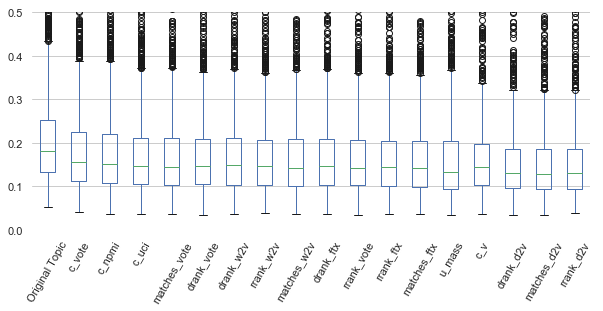

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 4))
sns.despine(bottom=True, left=True)

rotation = 60
w.boxplot(rot=rotation)

ax.xaxis.label.set_visible(False)
ax.xaxis.grid(False)
ax.set_ylim((0, 0.5))
#ax.yaxis.set_tick_params(labelright=True, labelleft=False)

fig.savefig(f'../img/reranker_weights.pdf', bbox_inches='tight')

plt.suptitle('')

In [ ]:
sns.set(style="whitegrid")
    #sns.set()

    # Initialize the figure
    fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(10, 3))
    sns.despine(bottom=True, left=True)

    av = statz.avg.groupby('topic_id').mean()
    mx = statz.avg.groupby('topic_id').max()
    mn = statz.avg.groupby('topic_id').min()

    metrics = pd.concat([av, mx, mn], axis=1, keys=['Mean', 'Max', 'Min'])
    metrics['dataset'] = metrics.index.to_series().apply(lambda x: id_to_dataset[x])
    metrics

    rotation = 60
    metrics.boxplot(column='Max', ax=axs[0], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Mean', ax=axs[1], by='dataset', rot=rotation, showfliers=True)
    metrics.boxplot(column='Min', ax=axs[2], by='dataset', rot=rotation, showfliers=True)

    for ax in axs:
        ax.xaxis.label.set_visible(False)
        ax.xaxis.grid(False)
    axs[2].yaxis.set_tick_params(labelright=True, labelleft=False)

In [75]:
wd = dfs['weight_diff'].mean().to_frame().reset_index()
wd.metric = wd.metric.apply(lambda x: changes[x] if x in changes else x)
wd = wd.rename(columns={'metric': 'rank_metric', 0: 'weight_diff'}).dropna().reset_index(drop=True)
wd = wd.sort_values('weight_diff')
wd

,rank_metric,weight_diff
11,Original Topic,0.000
14,c_vote,0.027
0,c_npmi,0.034
1,c_uci,0.039
10,matches_vote,0.042
6,drank_vote,0.043
15,drank_w2v,0.043
17,rrank_w2v,0.044
16,matches_w2v,0.045
7,drank_ftx,0.045
